# Compte rendu TP2

## Introduction

Dans ce TP nous étudions un modèle de données qui regroupe des informations sur un ensemble de voitures.

## Déscription du jeu de données


Parmis les variables étudiées nous retrouvons des variables quantitatives, discrètes et catégorielle.

**Model_Year**
Variable quantitative représentant l'année de construction du modèle de voiture. (1970 - 1982)

**Origin**
Variable catégorielle représentant le pays d'origine de construction de la voiture.

**Weight**
Variable discrète représentant le poids de la voiture.

**MPG (Miles Per Gallion)**
Variable discrète représentant la consomation en carburant (Gallion / miles) d'une voiture.

**Horsepower**
Variable discrète représentant la puissance d'une voiture en chevaux.

**Displacement**
Variable discrète représentant la cylindre de la voiture

**Acceleration**
Variable discrète représentant l'accélération de la voiture

Si nous nous intéressons à nos variables indépendemment nous pouvons retracer dans un tableau les statistiques descriptives de chaques variables.

In [1]:
import pandas as pd

df = pd.read_excel("Carsmall3.xlsx", sheet_name=0, header=0, index_col=0, engine="openpyxl")
print(f"Le jeu de données nous permet d'étudier un ensemble de {df.shape[0]} voitures avec {df.shape[1]} variables:\n{df.columns.values}")

Le jeu de données nous permet d'étudier un ensemble de 280 voitures avec 7 variables:
['Model_Year' 'Origin' 'Weight' 'MPG' 'Horsepower' 'Displacement'
 'Acceleration']


In [2]:
# slice from 1 -> end of array to remove the first line describing the number of row for each variable
# the function describe already takes care of nan values
df.describe()[1:]

Model_Year       Weight        MPG  Horsepower  Displacement  \
mean   76.035714  2968.257143  23.888571  107.189286    197.862500   
std     4.382943   846.448133   8.404399   41.421730    109.302431   
min    70.000000  1613.000000   9.000000   46.000000     68.000000   
25%    72.000000  2233.000000  17.000000   76.000000    105.000000   
50%    78.000000  2789.500000  23.000000   92.000000    151.000000   
75%    80.000000  3542.000000  30.000000  137.250000    302.500000   
max    82.000000  5140.000000  46.600000  230.000000    455.000000   

      Acceleration  
mean     15.305357  
std       2.951873  
min       8.000000  
25%      13.475000  
50%      15.150000  
75%      17.125000  
max      24.800000

Nous pouvons également représenter ces données sous formes de graphiques. Dans un premier temps la représentation sous forme de diagramme en baton nous permet d'observer la répartition des variables.

In [3]:
import matplotlib.pyplot as plt

def study_var(df, column):
    plt.figure()
    df[column].value_counts().sort_index().plot.bar()
    plt.title(column)
    plt.xlabel(f"Répartition de {column}")
    plt.ylabel("Nombre d'individus")


study_var(df, "Model_Year")
study_var(df, "Weight")
study_var(df, "MPG")
study_var(df, "Horsepower")
study_var(df, "Displacement")
study_var(df, "Acceleration")
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

Dans un second temps, nous traçons des boxplot pour affiner cette notion de répartition en observant les quartiles.

<AxesSubplot:>

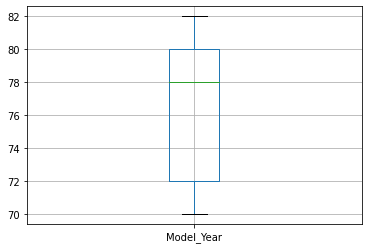

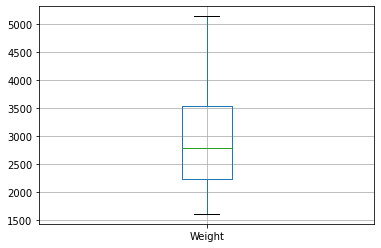

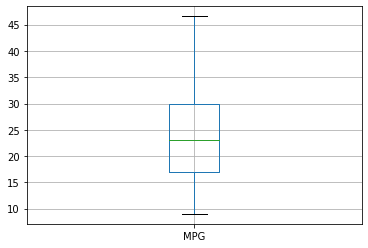

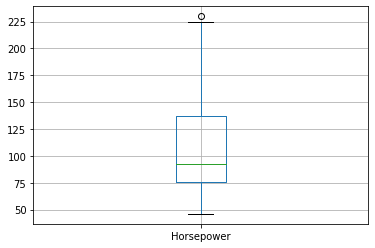

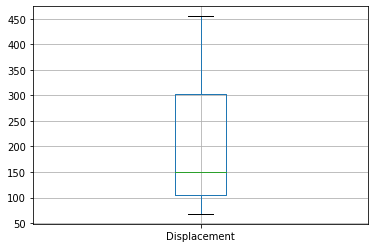

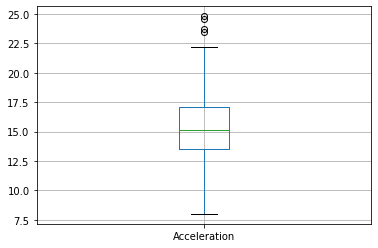

In [4]:
df.boxplot("Model_Year")
plt.figure()
df.boxplot("Weight")
plt.figure()
df.boxplot("MPG")
plt.figure()
df.boxplot("Horsepower")
plt.figure()
df.boxplot("Displacement")
plt.figure()
df.boxplot("Acceleration")

Nous pouvons également comparer la répartition d'un variable en fonction d'une autre. Par exemple la répartition du poids des modèles de voitures en fonction de l'année de sortie du modèle (comme sur le graphique suivant).

<AxesSubplot:title={'center':'Weight'}, xlabel='[Model_Year]'>

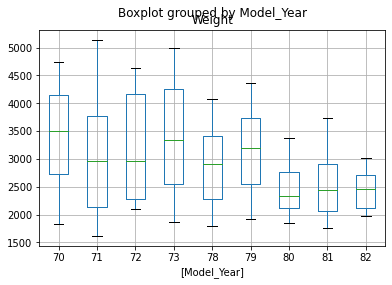

In [5]:
df.boxplot(column=["Weight"], by=['Model_Year'])

On remarque ici que plus le modèle est récent est plus les véhicules sont légers. On peut également voir que globalement l'écart de poids entre modèle est plus faible plus le modèle est récent.

## Étude du jeu de données 

Nous pouvons maintenant nous amuser à étudier les données. La première chose que nous pouvons étudier et de comparer une variable par rapport à une autre. Par exemple pour tous les modèles de voiture nous voulons voir comment la consomation d'essence est liée au poids de la voiture

<AxesSubplot:xlabel='Weight', ylabel='MPG'>

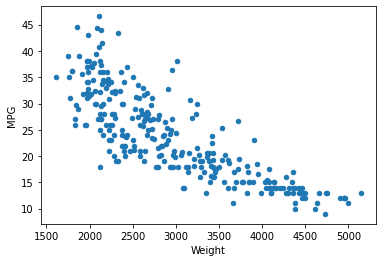

In [6]:
df.plot.scatter(x="Weight", y="MPG")

On remarque ici que le nuage de point est assez homogène. La tendance montre que plus la voiture est légère moins elle consomme et inversement. Comparons maintenant d'autres caractéristiques de la voiture en fonction du poids : 

<AxesSubplot:xlabel='Weight', ylabel='Displacement'>

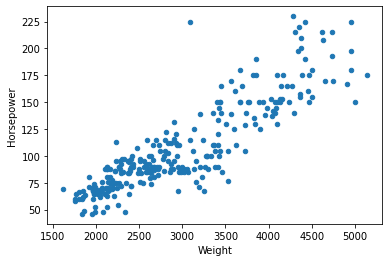

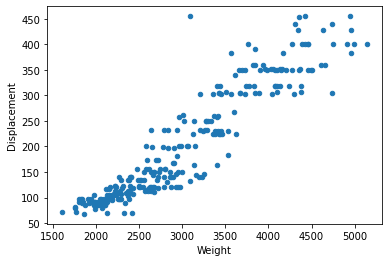

In [7]:
df.plot.scatter(x="Weight", y="Horsepower")
df.plot.scatter(x="Weight", y="Displacement")

On peut dire que le poids à une grosse influence sur les autres caractéristiques comme la puissance et le cylindre de la voiture.
Un autre outil qui est adapté pour comparer les caractéristiques entre elles est la correlation. Pour représenter cette valeure nous utilisons une heatmap.

<AxesSubplot:>

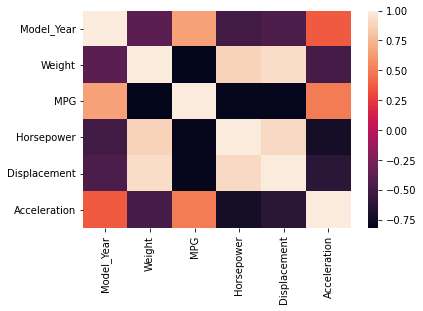

In [8]:
import seaborn as sns

sns.heatmap(df.corr())

La heatmap nous permet d'identifier grâce à un code couleur les différents ordres de grandeur dans un tableau de données.

### Étude de deux variables entre elles
Dans certains cas il peut être judicieux de comparer plusieurs variables entre elles. Ici par exemple nous cherchons à observer la répartition du nombre de voiture en fonction de l'origine et de l'année de création. Pour faire cela nous utilisons la fonction `crosstab` de la librairie `pandas`. Cela nous permet de générer un jeu de données comme celui-ci. 

In [24]:
pd.crosstab(df.Origin, df.Model_Year)

Model_Year  70  71  72  73  78  79  80  81  82
Origin                                        
Europe       6   4   5   7   6   4   8   3   2
Japan        2   4   5   4   8   2  13  12   9
USA         27  19  18  29  22  23   6  13  19

In [ ]:
Pour avoir une représentation plus visuelle nous pouvons utiliser encore une heatmap.

<AxesSubplot:xlabel='Model_Year', ylabel='Origin'>

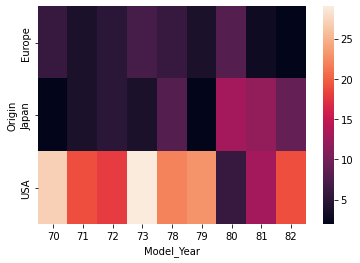

In [25]:
sns.heatmap(pd.crosstab(df.Origin, df.Model_Year))

On voit ici que la plus grosse production de voiture se fait aux USA. On peut également observer que la production de voiture à augmenter au japon au fil des années alors qu'en europe et USA la production est plus ou moins constante. Il serait intéressant d'avoir un jeu de données sur une plus longue durée pour vraiment faire un comparatif plus précis et pouvoir émettre un bilan.